In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1

X = x.reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

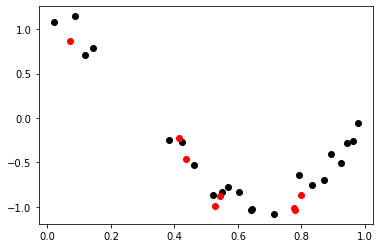

In [5]:
plt.plot(X_train, y_train, 'ko')
plt.plot(X_test, y_test, 'ro')

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [7]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('lm', LinearRegression())])

In [8]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

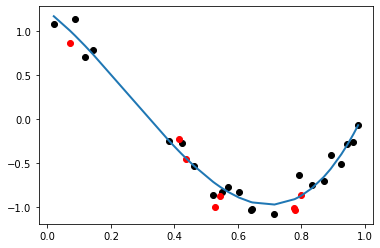

In [9]:
plt.plot(X_train, y_train, 'ko')
plt.plot(X_test, y_test, 'ro')

plt.plot(X, model.predict(X), lw=2)

In [10]:
def make_and_train(deg):
    model = Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)), 
                      ('lm', LinearRegression())])
    model.fit(X_train, y_train)
    return model

def make_plot_for_degree(deg):
    model = make_and_train(deg)
    
    plt.plot(X_train, y_train, 'ko')
    plt.plot(X_test, y_test, 'ro')

    plt.plot(X, model.predict(X), lw=2)

In [11]:
from ipywidgets import interact, IntSlider

In [12]:
interact(make_plot_for_degree, deg=IntSlider(min=1, max=20, step=1, value=3))

interactive(children=(IntSlider(value=3, description='deg', max=20, min=1), Output()), _dom_classes=('widget-i…

<function __main__.make_plot_for_degree(deg)>

In [13]:
degrees = list(range(2, 12))
train_errors = []
test_errors = []
for deg in degrees:
    model = make_and_train(deg)
    train_err = 1 - model.score(X_train, y_train)
    test_err = 1 - model.score(X_test, y_test)
    train_errors.append(train_err)
    test_errors.append(test_err)

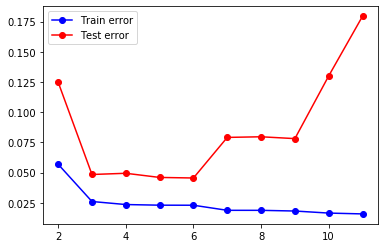

In [14]:
plt.plot(degrees, train_errors, 'b-o', label="Train error")
plt.plot(degrees, test_errors, 'r-o', label="Test error")
plt.legend()